<a href="https://colab.research.google.com/github/RoselinSnehaJ/Netflix-Data-Exploration/blob/main/Netflix%20data%20exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [ ]:
!gdown https://drive.google.com/file/d/1WOMyuGM4MMM92ONfjb4pHgqeXcWn55iB/view?usp=drive_link -O netflix.csv

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:44: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1WOMyuGM4MMM92ONfjb4pHgqeXcWn55iB
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1WOMyuGM4MMM92ONfjb4pHgqeXcWn55iB/view?usp=drive_link
To: /content/netflix.csv
8.06kB [00:00, 61.1MB/s]


To gain a better understanding of the dataset and the values it contains, we'll start by extracting the top 5 records. This will give us a quick overview of the structure and content of the dataset. we'll use the pandas library to read the dataset from a CSV file located in Google Drive.

In [ ]:
# Extracting Top 5 Records to Understand Dataset
data = pd.read_csv('/content/drive/MyDrive/netflix.csv')
top_5= data.head(5)
top_5

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


data.info() is helpful for understanding the structure of the dataset, identifying any missing values, and gaining insights into the data types of each attribute.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data.shape

(8807, 12)

This code calculates the sum of null values for each column. By examining this information, we can identify which columns have missing values and assess the extent of missing data in your dataset. This is crucial for data preprocessing and quality assessment before performing any further analysis or modeling.

In [ ]:
# sum of null values
null_columns = data.isnull().sum()
null_columns

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In many datasets, categorical variables often contain missing values. To ensure consistency and facilitate analysis, I have updated these missing values with a placeholder value, such as 'unknown_column_name'.

We'll start by identifying the categorical variables with missing values and replace them with 'unknown_column_name'. In this example, we'll focus on the following categorical columns: 'director','description', 'cast','listed_in', 'country', 'duration'

In [ ]:
# Handling Missing Values in Categorical Variables
categorical_cols = ['director','description', 'cast','listed_in', 'country', 'duration']

# Replacing missing values with 'unknown_column_name'
data[categorical_cols] = data[categorical_cols].fillna('unknown_column_name')
data[categorical_cols]

,director,description,cast,listed_in,country,duration
0,Kirsten Johnson,"As her father nears the end of his life, filmm...",unknown_column_name,Documentaries,United States,90 min
1,unknown_column_name,"After crossing paths at a party, a Cape Town t...","Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","International TV Shows, TV Dramas, TV Mysteries",South Africa,2 Seasons
2,Julien Leclercq,To protect his family from a powerful drug lor...,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","Crime TV Shows, International TV Shows, TV Act...",unknown_column_name,1 Season
3,unknown_column_name,"Feuds, flirtations and toilet talk go down amo...",unknown_column_name,"Docuseries, Reality TV",unknown_column_name,1 Season
4,unknown_column_name,In a city of coaching centers known to train I...,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","International TV Shows, Romantic TV Shows, TV ...",India,2 Seasons
...,...,...,...,...,...,...
8802,David Fincher,"A political cartoonist, a crime reporter and a...","Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...","Cult Movies, Dramas, Thrillers",United States,158 min
8803,unknown_column_name,"While living alone in a spooky town, a young g...",unknown_column_name,"Kids' TV, Korean TV Shows, TV Comedies",unknown_column_name,2 Seasons
8804,Ruben Fleischer,Looking to survive in a world taken over by zo...,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...","Comedies, Horror Movies",United States,88 min
8805,Peter Hewitt,"Dragged from civilian life, a former superhero...","Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...","Children & Family Movies, Comedies",United States,88 min


In datasets containing continuous variables, missing values are common occurrences. To keep our data consistent and make analysis easier, so lets replace these missing values with 0.

lets focus on the continuous variable 'release_year', 'rating', 'data_added' and replace any missing values with 0.

In [ ]:
# Handling Missing Values in Continuous Variables
continuous_cols = ['release_year', 'rating', 'date_added']

# Replace missing values with 0
data[continuous_cols] = data[continuous_cols].fillna(0)
data[continuous_cols]

,release_year,rating,date_added
0,2020,PG-13,"September 25, 2021"
1,2021,TV-MA,"September 24, 2021"
2,2021,TV-MA,"September 24, 2021"
3,2021,TV-MA,"September 24, 2021"
4,2021,TV-MA,"September 24, 2021"
...,...,...,...
8802,2007,R,"November 20, 2019"
8803,2018,TV-Y7,"July 1, 2019"
8804,2009,R,"November 1, 2019"
8805,2006,PG,"January 11, 2020"


If there are no null values present in the DataFrame, the output will indicate zeros for all columns. However, if any null values persist, their counts will be displayed, indicating areas that may require further data cleaning or handling.

In [ ]:
#checking if the replacement process was successful
null_check = df.isnull().sum()
null_check

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In some cases, certain columns in our dataset contain multiple values separated by commas. To better analyze this data, I have un-nested these columns by creating multiple rows for each value. In this example, we'll focus on the 'cast', 'listed in', 'country'and 'director' columns.

In [ ]:
# Unnesting Columns with Multiple Comma-Separated Values
data_cast = data.assign(cast=data['cast'].str.split(',')).explode('cast').reset_index(drop=True)
data_listedin = data_cast.assign(listed_in=data_cast['listed_in'].str.split(',')).explode('listed_in').reset_index(drop=True)
data_country = data_listedin.assign(country=data_listedin['country'].str.split(',')).explode('country').reset_index(drop=True)
df = data_country.assign(director=data_country['director'].str.split(',')).explode('director').reset_index(drop=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_column_name,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown_column_name,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,unknown_column_name,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,unknown_column_name,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,unknown_column_name,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [ ]:
#Removed leading and trailing whitespaces
df['country'] = df['country'].str.lower()
df['country'] = df['country'].str.strip()
df['title'] = df['title'].str.lower()
df['title'] = df['title'].str.strip()

In [ ]:
top10 = df.head(10)
top10

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
5,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
6,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
7,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
8,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
9,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."


For non-graphical analysis, we'll leverage the value_counts() method to explore the frequency of each category within individual columns. Here's how I achieved this:

In [ ]:
df['type'].value_counts()

Movie      145917
TV Show     56148
Name: type, dtype: int64

In [ ]:
df['title'].value_counts()

Black Mirror                                          150
Creeped Out                                           141
Heartbreak High                                       141
Narcos                                                126
Michael Bolton's Big, Sexy Valentine's Day Special    123
                                                     ... 
Jim Gaffigan: Cinco                                     1
Jen Kirkman: Just Keep Livin’?                          1
Formula 1: Drive to Survive                             1
Peter and the Farm                                      1
Dick Johnson Is Dead                                    1
Name: title, Length: 8807, dtype: int64

In [ ]:
df['director'].value_counts()

unknown_column_name    50643
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
                       ...  
 Reuben Atlas              1
Max Amini                  1
Bassam Tariq               1
Paul Miller                1
Kirsten Johnson            1
Name: director, Length: 5121, dtype: int64

In [ ]:
df['cast'].value_counts()

unknown_column_name       825
 Anupam Kher               39
 Rupa Bhimani              31
 Takahiro Sakurai          30
 Julie Tejwani             28
                         ... 
 Vedika                     1
 Tedros Teclebrhan          1
 Maryam Zaree               1
 Melanie Straub             1
 Chittaranjan Tripathy      1
Name: cast, Length: 39297, dtype: int64

In [ ]:
df['country'].value_counts()

United States                                 38551
India                                         19816
Japan                                          6584
United Kingdom                                 5180
South Korea                                    4234
                                              ...  
Germany, United States, Sweden                    1
United States, Botswana                           1
United States, Uruguay                            1
United States, Brazil, Japan, Spain, India        1
France, New Zealand                               1
Name: country, Length: 748, dtype: int64

In [ ]:
df['date_added'].value_counts()

January 1, 2020       2232
November 1, 2019      1656
December 31, 2019     1586
March 1, 2018         1567
July 1, 2021          1283
                      ... 
December 5, 2017         1
November 18, 2020        1
April 10, 2018           1
September 28, 2017       1
September 25, 2021       1
Name: date_added, Length: 1767, dtype: int64

In [ ]:
df['release_year'].value_counts()


2018    24441
2019    21931
2017    20516
2020    19697
2016    18465
        ...  
1947        8
1946        6
1942        6
1943        5
1925        1
Name: release_year, Length: 74, dtype: int64

In [ ]:
df['rating'].value_counts()

TV-MA       56695
TV-14       38644
R           15152
TV-PG       11944
PG-13        9860
PG           5955
TV-Y7        4287
TV-G         2435
TV-Y         2407
NR           1133
G             728
NC-17          71
TV-Y7-FV       66
UR             65
74 min          1
84 min          1
66 min          1
Name: rating, dtype: int64

In [ ]:
df['duration'].value_counts()

1 Season     30168
2 Seasons     8147
3 Seasons     4031
94 min        2778
97 min        2707
             ...  
9 min            2
16 min           2
11 min           2
3 min            2
8 min            1
Name: duration, Length: 220, dtype: int64

In [ ]:
df['listed_in'].value_counts()

 International Movies    27141
Dramas                   19657
Comedies                 13894
Action & Adventure       12216
 Dramas                  10149
                         ...  
 Stand-Up Comedy            24
Romantic Movies             20
TV Sci-Fi & Fantasy          7
LGBTQ Movies                 5
Sports Movies                3
Name: listed_in, Length: 73, dtype: int64

For graphical analysis, we can utilize the Seaborn library's count plot function to visually represent the counts of each category and their respective counts.

<Axes: xlabel='type', ylabel='count'>

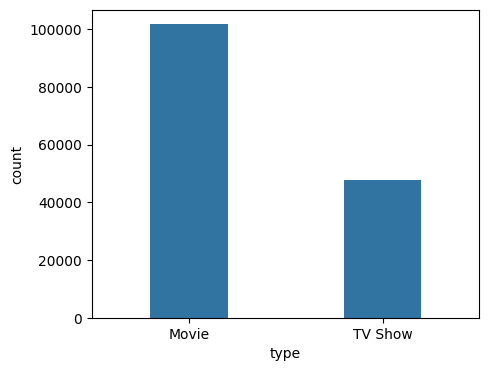

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(data=df,x='type',width=0.4)

<Axes: xlabel='date_added', ylabel='count'>

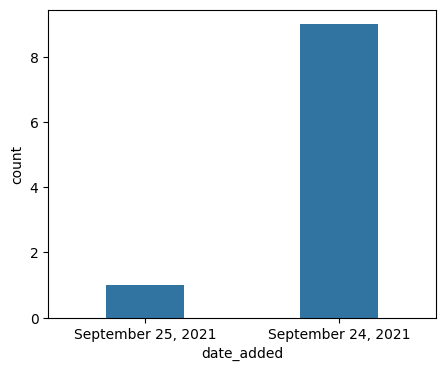

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(data=top10,x='date_added', width=0.4)

<Axes: xlabel='release_year', ylabel='count'>

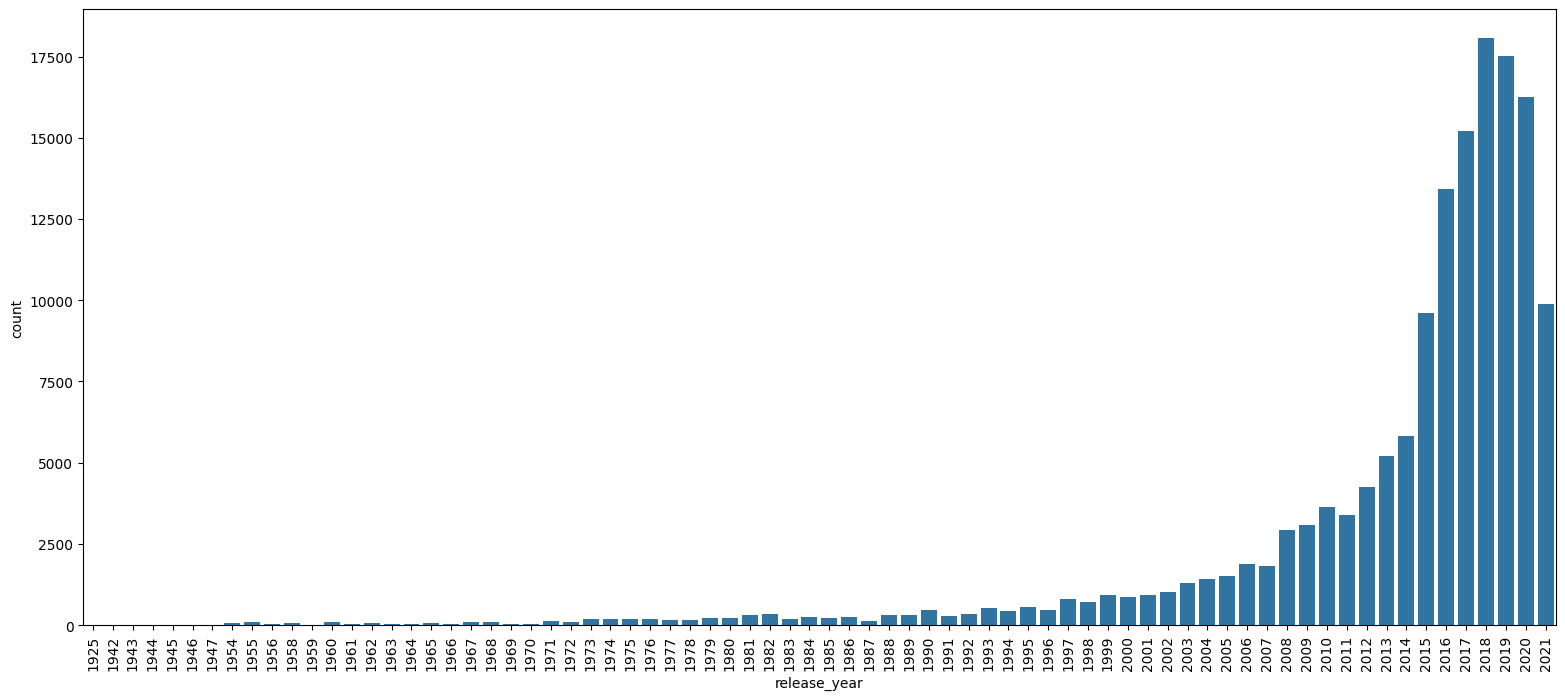

In [ ]:
plt.figure(figsize=(19,8))
plt.xticks(rotation=90)
sns.countplot(data=df,x='release_year')

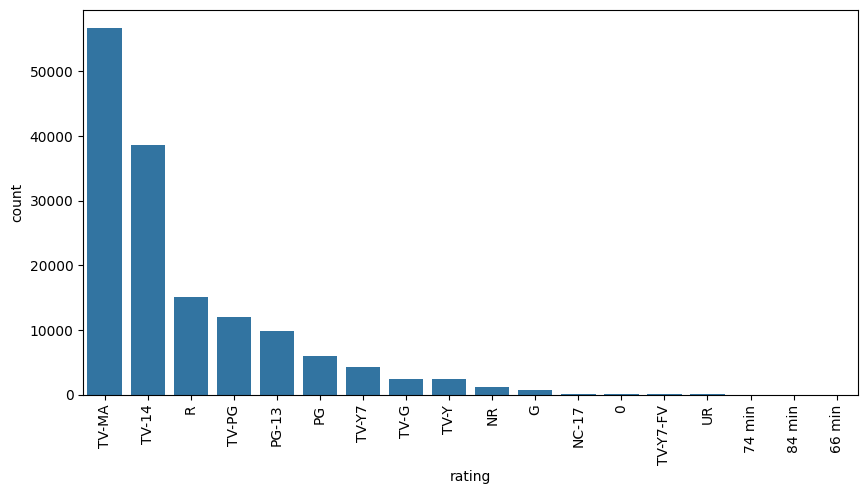

In [ ]:
sorted = df['rating'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(data=df,x='rating',order=sorted.index)
plt.show()

<Axes: xlabel='duration', ylabel='count'>

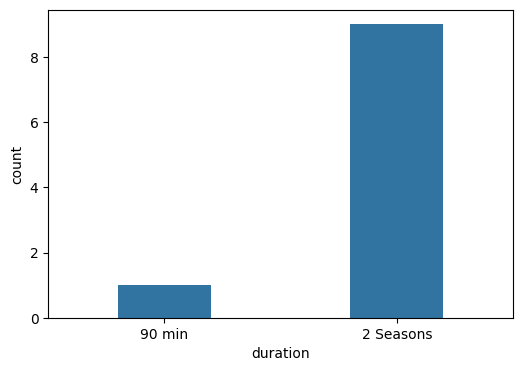

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=top10,x='duration', width=0.4)

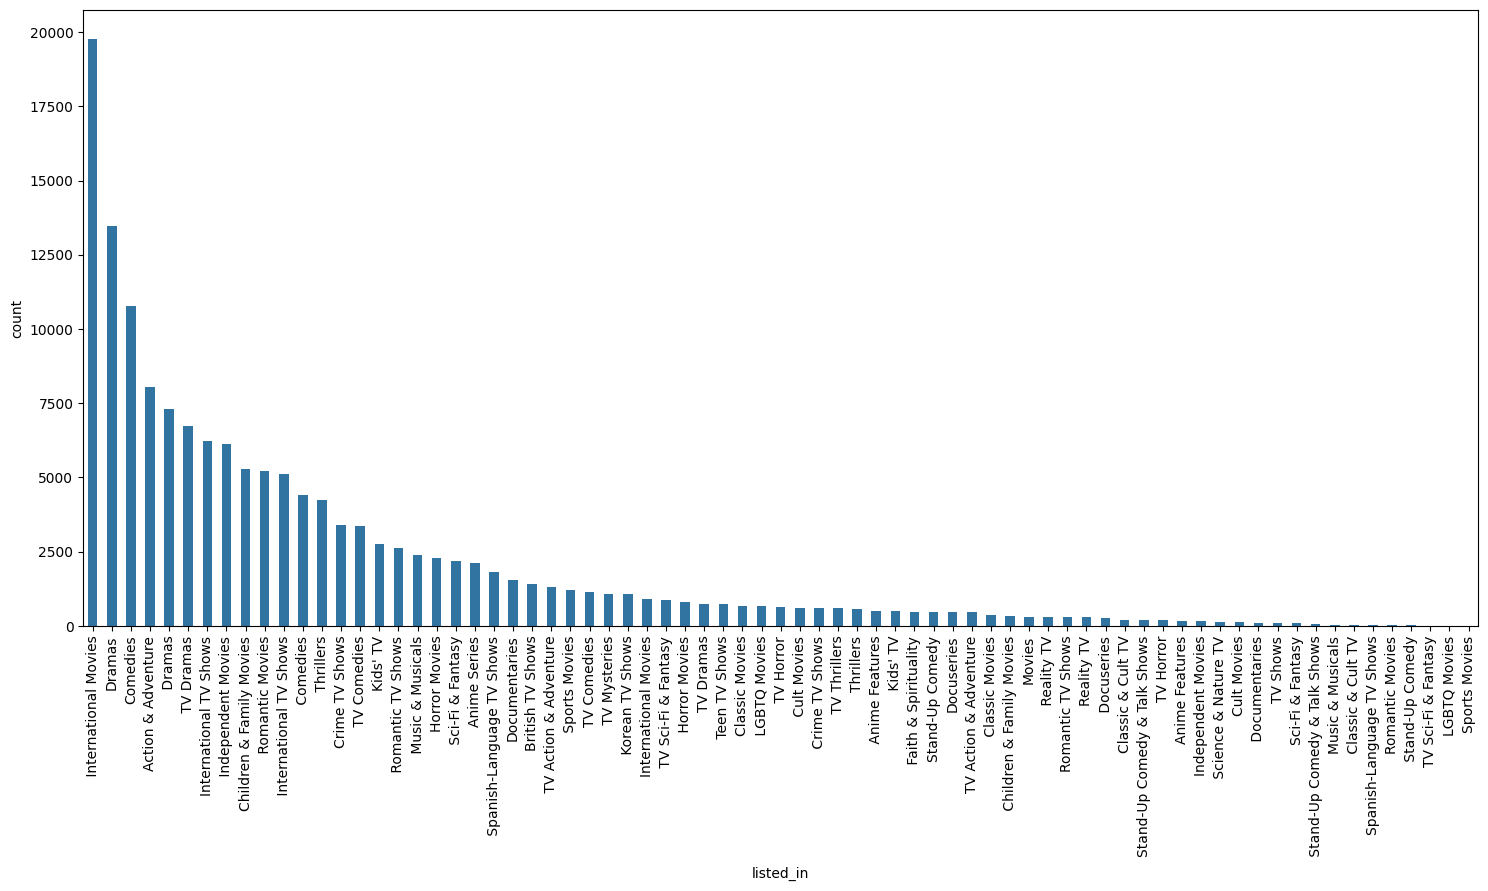

In [ ]:
sorted_df = df['listed_in'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sns.countplot(data=df,x='listed_in',order=sorted_df.index, width=0.5)
plt.show()

Determining the number of unique titles of movies produced in top 10 countries

In [ ]:
# Filtering the DataFrame to include only movies
movies = df[df['type'] == 'Movie']
movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
159,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
160,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Vanessa Hudgens,NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
161,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
162,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Kimiko Glenn,NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [ ]:
# Group the movies by country and count the number of unique titles
country_movie_counts = movies.groupby('country')['title'].nunique()

# Sorting the counts in descending order and displaying the top 10 countries
country_movie_counts.sort_values(ascending=False).head(10)

country
United States          2058
India                   893
unknown_column_name     440
United Kingdom          206
Canada                  122
Spain                    97
Egypt                    92
Nigeria                  86
Indonesia                77
Turkey                   76
Name: title, dtype: int64

To identify the number of TV shows produced in each country and determine the top 10 countries:

In [ ]:
# Filter the DataFrame to include only TV shows
tv_show = df[df['type'] == 'TV Show']
tv_show

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,unknown_column_name,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,unknown_column_name,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,unknown_column_name,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,unknown_column_name,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
5,s2,TV Show,Blood & Water,unknown_column_name,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
149403,s8801,TV Show,Zindagi Gulzar Hai,unknown_column_name,Hina Khawaja Bayat,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,Romantic TV Shows,"Strong-willed, middle-class Kashaf and carefre..."
149404,s8801,TV Show,Zindagi Gulzar Hai,unknown_column_name,Hina Khawaja Bayat,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,TV Dramas,"Strong-willed, middle-class Kashaf and carefre..."
149453,s8804,TV Show,Zombie Dumb,unknown_column_name,unknown_column_name,unknown_column_name,"July 1, 2019",2018,TV-Y7,2 Seasons,Kids' TV,"While living alone in a spooky town, a young g..."
149454,s8804,TV Show,Zombie Dumb,unknown_column_name,unknown_column_name,unknown_column_name,"July 1, 2019",2018,TV-Y7,2 Seasons,Korean TV Shows,"While living alone in a spooky town, a young g..."


In [ ]:
# Group the TV shows by country and count the number of unique titles
country_TVshow_counts = tv_show.groupby('country')['title'].nunique()

# Sort the counts in descending order and display the top 10 countries
country_TVshow_counts.sort_values(ascending=False).head(10)

country
United States          760
unknown_column_name    391
United Kingdom         213
Japan                  169
South Korea            158
India                   79
Taiwan                  68
Canada                  59
France                  49
Spain                   48
Name: title, dtype: int64

The data is grouped by genre, and then the number of unique countries for each genre is counted. The resulting counts are sorted in descending order and plotted as a bar chart.

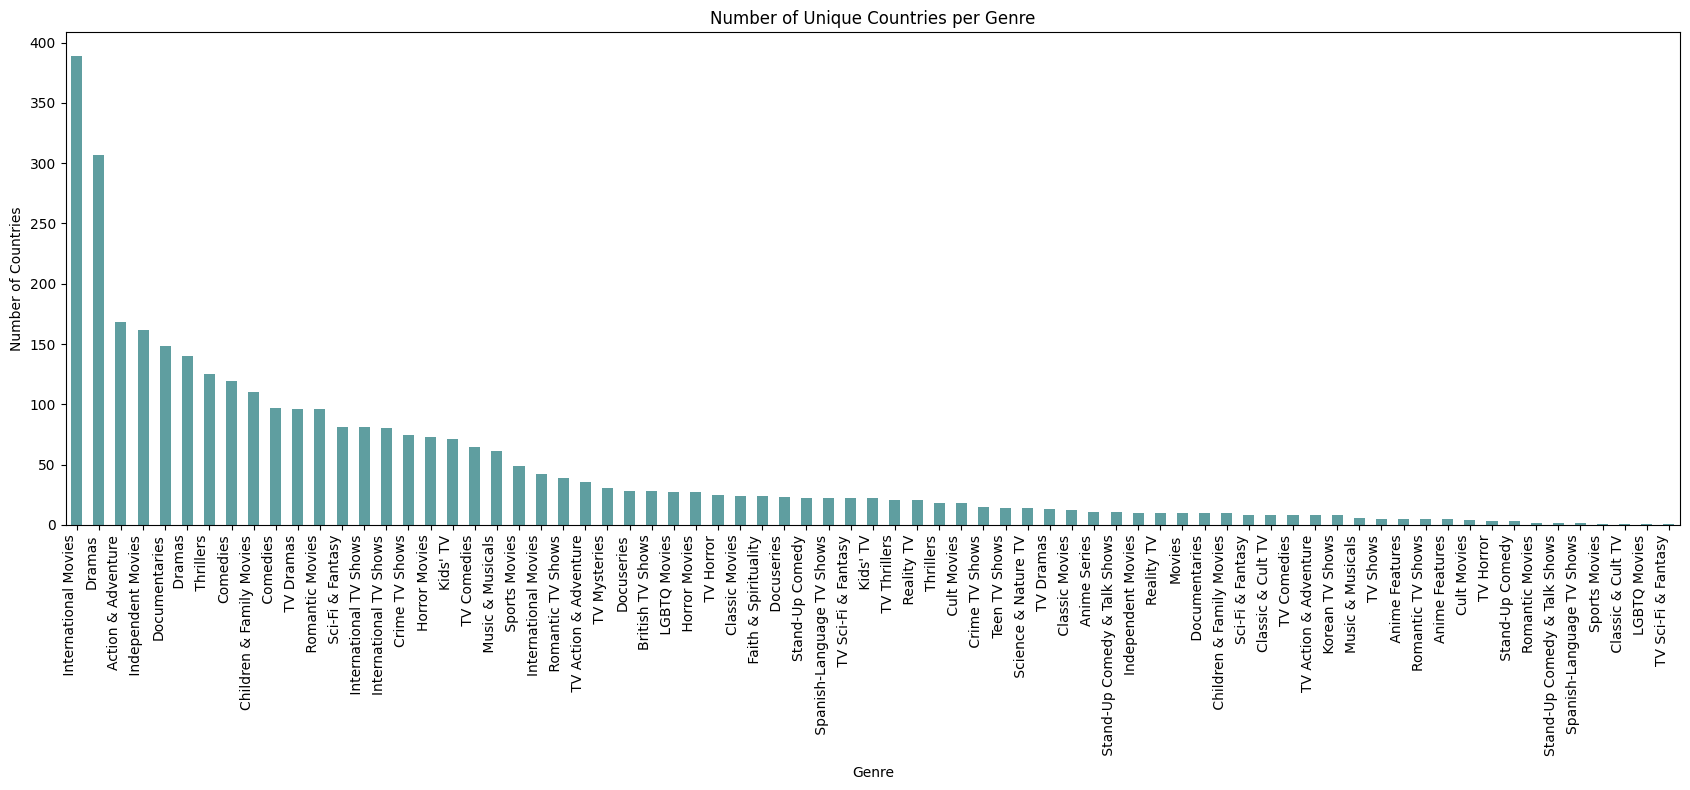

In [ ]:
country_genre_counts = df.groupby('listed_in')['country'].nunique()

plt.figure(figsize=(17,8))
country_genre_counts.sort_values(ascending=False).plot(kind='bar', color='cadetblue')
plt.title('Number of Unique Countries per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Countries')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

This analysis provides insights into the most favorable weeks for releasing movies and TV shows, aiding in strategic decision-making for distributors.

In [ ]:
#Analysis: Identifying the Best Week to Release Movies and TV Shows

df['date_added'] = pd.to_datetime(df['date_added'])
df['week_year_added'] = df['date_added'].dt.strftime('%U')
weekly_counts = df.groupby(['type', 'week_year_added']).size()
best_week_movies = weekly_counts.loc['Movie'].idxmax()
best_week_tv_shows = weekly_counts.loc['TV Show'].idxmax()
print("Best week to release a movie:", best_week_movies)
print("Best week to release a TV show:", best_week_tv_shows)

Best week to release a movie: 00
Best week to release a TV show: 27


The objective of this analysis is to determine the optimal month for releasing movies and TV shows separately. By analyzing historical data on release dates, we can uncover patterns and trends to guide decision-making regarding release timing.

In [ ]:
# Analysis: Identifying the Best Month to Release Movies and TV Shows

df['date_added'] = pd.to_datetime(df['date_added'])

df['month_added'] = df['date_added'].dt.strftime('%B')

monthly_counts_movies = df[df['type'] == 'Movie'].groupby('month_added').size()
monthly_counts_tv_shows = df[df['type'] == 'TV Show'].groupby('month_added').size()

best_month_movies = monthly_counts_movies.idxmax()
best_month_tv_shows = monthly_counts_tv_shows.idxmax()

print("Best month to release a movie:", best_month_movies)
print("Best month to release a TV show:", best_month_tv_shows)

Best month to release a movie: July
Best month to release a TV show: July


The objective of this analysis is to identify the top 10 actors who have appeared in the most movies and TV shows. By grouping the data by cast and counting the number of unique titles they have been associated with, we can determine the most prolific directors in the dataset.

In [ ]:
# Analysis: Identifying the Top 10 actors with the Most Titles in TV Shows

top_cast_tvshow = df[df['type']== 'TV Show'].groupby('cast')['title'].nunique().sort_values(ascending=False).head(10)
top_cast_tvshow

cast
 Takahiro Sakurai     24
 Junichi Suwabe       17
 Ai Kayano            17
 Yuki Kaji            17
David Attenborough    14
 Daisuke Ono          14
 Yoshimasa Hosoya     13
 Takehito Koyasu      13
 Yuichi Nakamura      13
 Tomokazu Sugita      12
Name: title, dtype: int64

In [ ]:
# Analysis: Identifying the Top 10 actors with the Most Titles in movies

top_cast_movie = df[df['type']== 'Movie'].groupby('cast')['title'].nunique().sort_values(ascending=False).head(10)
top_cast_movie

cast
unknown_column_name    475
 Anupam Kher            38
 Om Puri                27
 Rupa Bhimani           27
Shah Rukh Khan          26
 Boman Irani            25
 Paresh Rawal           25
 Julie Tejwani          24
Akshay Kumar            23
 Rajesh Kava            21
Name: title, dtype: int64

The objective of this analysis is to identify the top 10 directors who have appeared in the most movies and TV shows. By grouping the data by director and counting the number of unique titles they have been associated with, we can determine the most prolific directors in the dataset.

In [ ]:
# Analysis: Identifying the Top 10 Directors with the Most Titles in TV Shows

top_directors_tvshow = df[df['type']== 'TV Show'].groupby('director')['title'].nunique().sort_values(ascending=False).head(10)
top_directors_tvshow

director
unknown_column_name                                                                                             2446
Alastair Fothergill                                                                                                3
Iginio Straffi                                                                                                     2
Stan Lathan                                                                                                        2
Rob Seidenglanz                                                                                                    2
Shin Won-ho                                                                                                        2
Hsu Fu-chun                                                                                                        2
Ken Burns                                                                                                          2
Moyoung Jin, Caroline Sá, Deepti Kakkar, Fahad Mustafa,

In [ ]:
# Analysis: Identifying the Top 10 directors with the Most Titles in movies

top_directors_movie = df[df['type']== 'Movie'].groupby('director')['title'].nunique().sort_values(ascending=False).head(10)
top_directors_movie

director
unknown_column_name       188
Rajiv Chilaka              19
Raúl Campos, Jan Suter     18
Suhas Kadav                16
Marcus Raboy               15
Jay Karas                  14
Cathy Garcia-Molina        13
Martin Scorsese            12
Youssef Chahine            12
Jay Chapman                12
Name: title, dtype: int64

This analysis offers insights into the distribution of movie genres and helps understand audience preferences and industry trends.

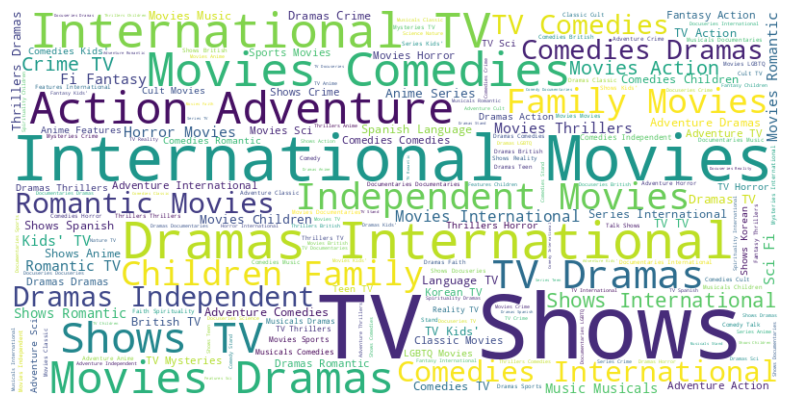

In [ ]:
# Analysis: Identifying Popular Movie Genres Using Word Cloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['listed_in']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The analysis reveals the average number of days after release when movies are typically added to Netflix.

In [ ]:
# Analysis: Determining Optimal Time to Add Movies to Netflix After Release

data['date_added'] = pd.to_datetime(data['date_added'])
data['release_year'] = pd.to_datetime(data['release_year'], format='%Y')
data['days_after_release'] = (data['date_added'] - data['release_year']).dt.days
No_of_days_after_release = data['days_after_release'].mode()[0]
print("No of days after release when movie is added to Netflix:", No_of_days_after_release, "days")

No of days after release when movie is added to Netflix: 334.0 days


Discovering the most popular rating category and its corresponding genre from the dataset.

In [ ]:
# Split the 'listed_in' column to get individual genres
genres = df['listed_in'].str.split(', ')

# Create a new DataFrame with the expanded genres
df_genres = df.loc[df.index.repeat(genres.str.len())]
df_genres['genre'] = [genre for sublist in genres for genre in sublist]

# Group by 'rating' and 'genre' and count occurrences
genre_counts = df_genres.groupby(['rating', 'genre']).size().reset_index(name='count')

# Sort the DataFrame by 'count' in descending order
sorted_genre_counts = genre_counts.sort_values(by='count', ascending=False)

print(sorted_genre_counts)

    rating                          genre  count
267  TV-MA           International Movies  11830
153  TV-14           International Movies   8742
301  TV-MA                         Dramas   7465
283  TV-MA                      TV Dramas   5203
297  TV-MA                       Comedies   4657
..     ...                            ...    ...
235   TV-G                   TV Thrillers      1
33      NR               Music & Musicals      1
227   TV-G      Spanish-Language TV Shows      1
347  TV-PG                Stand-Up Comedy      1
38      NR   Stand-Up Comedy & Talk Shows      1

[442 rows x 3 columns]


Analyzing which type of shows to produce and how to grow the business

In [ ]:
# Analyzing viewers preferences by counting the occurrences of each listed_in category
genres_counts = df['listed_in'].str.split(', ').explode().value_counts()

# Top genres
print("Top genres to focus on producing:")
print(genres_counts.head(3))  # You can adjust the number of top genres to display

# Determining how to grow the business based on the insights:
print("\nBusiness growth strategies:")
print("1. Produce more content in the top genres identified.")
print("2. Invest in high-quality productions that align with viewer preferences.")
print("3. Explore opportunities for international collaborations to diversify content offerings.")
print("4. Implement targeted marketing campaigns to promote new releases and attract subscribers.")

Top genres to focus on producing:
 International Movies    27141
Dramas                   19657
Comedies                 13894
Name: listed_in, dtype: int64

Business growth strategies:
1. Produce more content in the top genres identified.
2. Invest in high-quality productions that align with viewer preferences.
3. Explore opportunities for international collaborations to diversify content offerings.
4. Implement targeted marketing campaigns to promote new releases and attract subscribers.


**UNIVARIATE:**

The objective of this visualization is to analyze the distribution of movie releases over the last 20-30 years. The left subplot displays a bar chart and the right subplot displays a KDE plot.

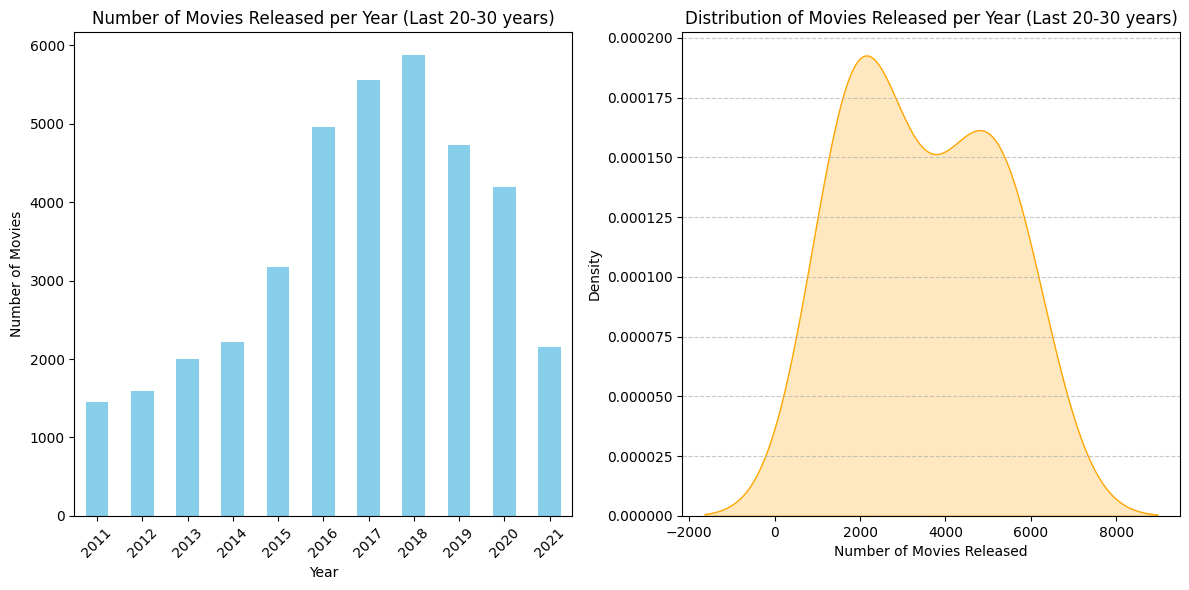

In [ ]:
#Analysis of Movie Releases in the Last 20-30 Years
# Filter movies
movies = df[df['type'] == 'Movie']

# Count movies per year
movies_per_year = movies.groupby('release_year').size()

# Filter last 20-30 years
last_20_30_years = movies_per_year.tail(11)

plt.figure(figsize=(12, 6))

# Bar chart
plt.subplot(1, 2, 1)
last_20_30_years.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released per Year (Last 20-30 years)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)

# KDE plot
plt.subplot(1, 2, 2)
sns.kdeplot(last_20_30_years, color='orange', fill=True)
plt.title('Distribution of Movies Released per Year (Last 20-30 years)')
plt.xlabel('Number of Movies Released')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The objective of this analysis is to compare the movies and TV shows in the dataset. By visualizing the frequency of each content type, we can understand the distribution of movies and TV shows and identify any differences in their prevalence.

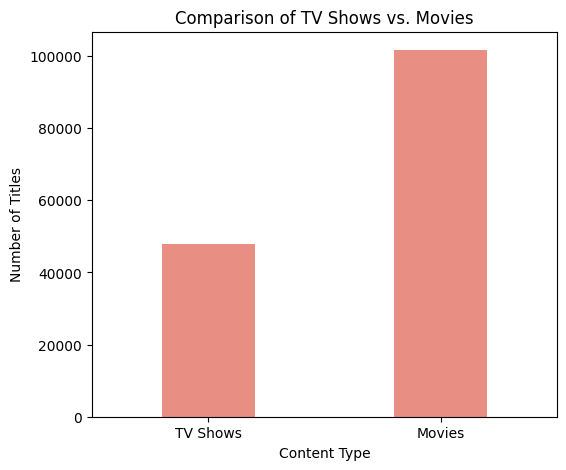

In [ ]:
# Analysis: Comparison of TV Shows vs. Movies
tv_shows_count = (df['type'] == 'TV Show').sum()
movies_count = (df['type'] == 'Movie').sum()

plt.figure(figsize=(6, 5))
sns.barplot(x=['TV Shows', 'Movies'], y=[tv_shows_count, movies_count], color='salmon',width=0.4)
plt.title('Comparison of TV Shows vs. Movies')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.show()

**BIVARIATE CHART**

The line plot illustrates the number of TV shows and movies released per year over the last 5 years. The x-axis represents the release year, while the y-axis indicates the number of titles released.

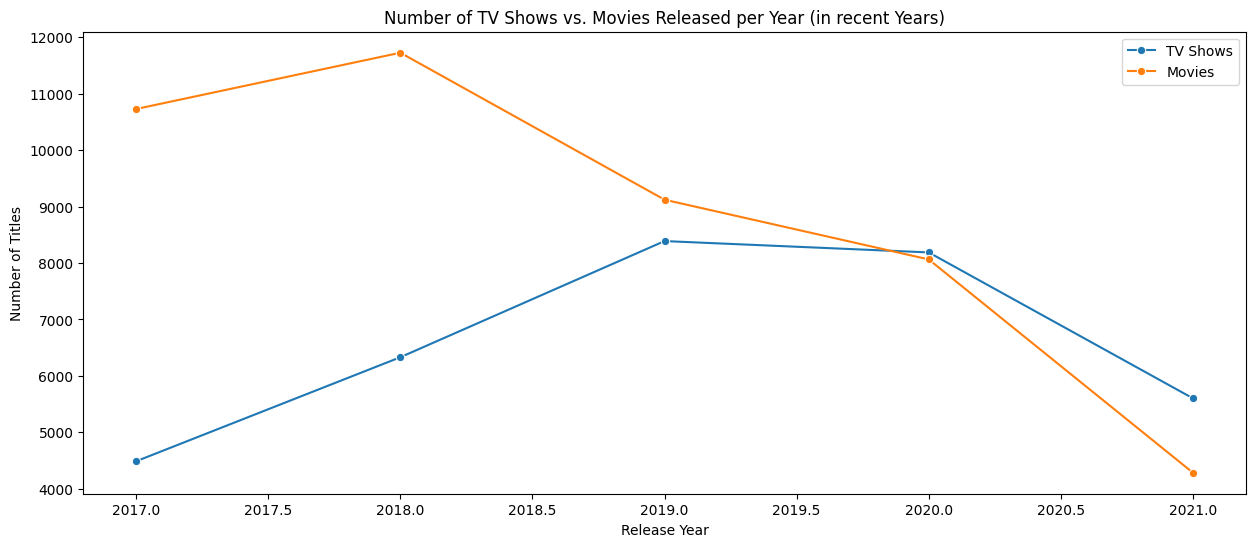

In [ ]:
# Filter recent years (last 5 years)
recent_years = df[df['release_year'] >= 2017]

# Count TV shows and movies per year
tv_shows_per_year = recent_years[recent_years['type'] == 'TV Show'].groupby('release_year').size()
movies_per_year = recent_years[recent_years['type'] == 'Movie'].groupby('release_year').size()

# linePlot
plt.figure(figsize=(15, 6))
sns.lineplot(data=tv_shows_per_year, marker='o', label='TV Shows')
sns.lineplot(data=movies_per_year, marker='o', label='Movies')
plt.title('Number of TV Shows vs. Movies Released per Year (in recent Years)')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.show()

**UNIVARIATE:**

The distplot showcases the distribution of release years. The x-axis represents the release year, while the y-axis indicates the frequency or density of occurrence. The plot includes a KDE curve it offers insights and pattern of the release year distribution, highlighting any peaks or clusters.

<ipython-input-204-7503ced66ac8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['release_year'], kde=True, bins=10, color='mediumorchid')


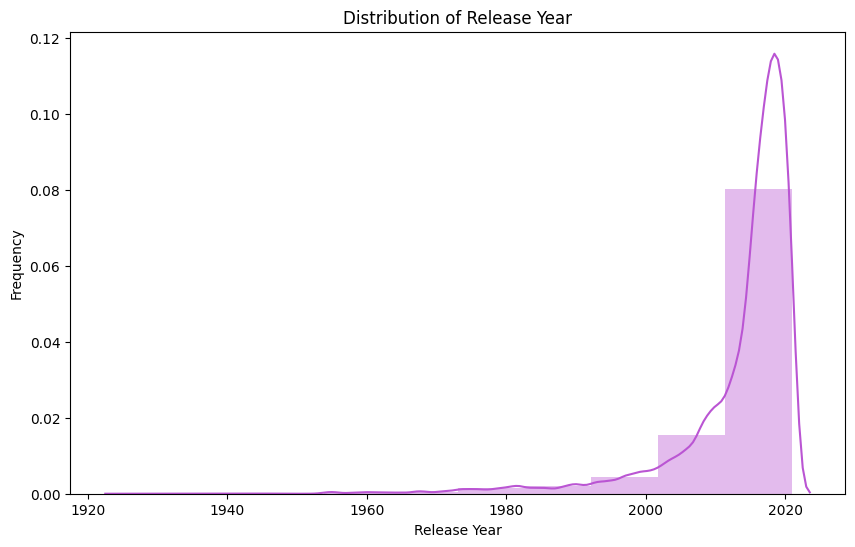

In [ ]:
# Distplot
plt.figure(figsize=(10, 6))
sns.distplot(df['release_year'], kde=True, bins=10, color='mediumorchid')
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

**UNIVARIATE:**

A histogram typically works with numerical columns. So this histogram visualizes the distribution of release years. The x-axis represents the release years, while the y-axis shows count of occurrences(frequency). The histogram is divided into 10 bins to group the release years into intervals, providing a clearer representation of the distribution.

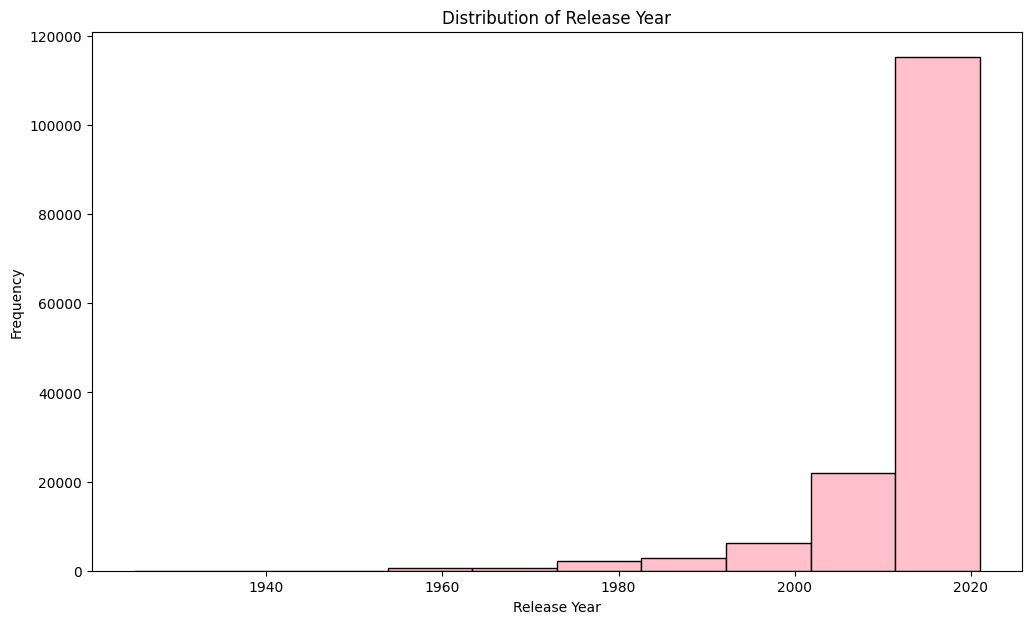

In [ ]:
# histogram for release_year
plt.figure(figsize= (12,7))
plt.hist(df['release_year'], bins=10, color='pink', edgecolor='black')
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

**UNIVARIATE:**

Both boxplot and violinplot visualizes the distribution of release years categorized by content type(Movie and TV Show). The x-axis represents the content type, while the y-axis indicates the release year. Outliers in the boxplot indicates movies and TV shows with release years significantly different from the majority, potentially highlighting unique or exceptional cases.

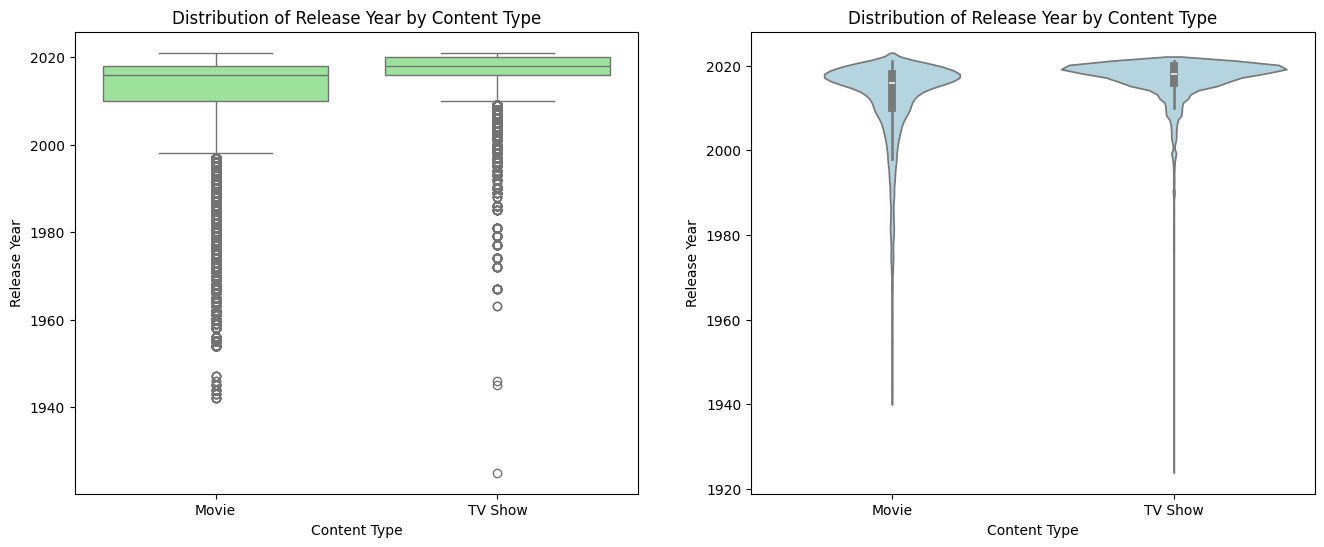

In [ ]:
plt.figure(figsize=(16,6))

# Boxplot for 'type'
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='type', y='release_year', color='lightgreen')
plt.title('Distribution of Release Year by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Release Year')

# Violinplot for 'type'
plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='type', y='release_year', color='lightblue')
plt.title('Distribution of Release Year by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Release Year')

plt.show()

Visualizing outliers with a zoomed-in box plot

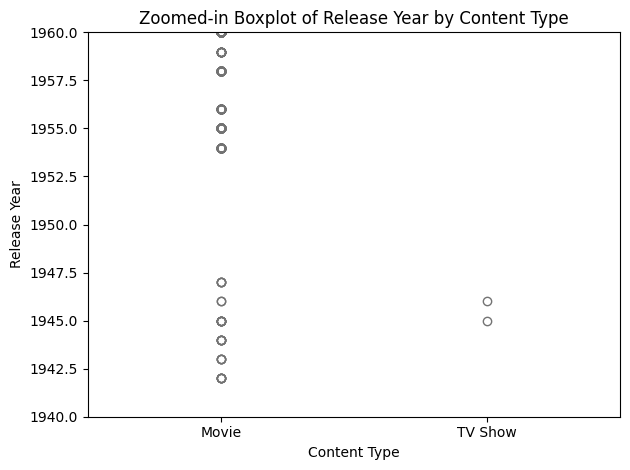

In [ ]:
sns.boxplot(data=df, x='type', y='release_year', color='lightgreen')
plt.ylim(1940, 1960)  # added y-axis limits to focus on the relevant range
plt.title('Zoomed-in Boxplot of Release Year by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Release Year')

plt.tight_layout()
plt.show()

**INSIGHTS**

*   The dataset contains a significantly higher number of movies 101,692 compared to TV shows 47,820, it's evident that movies dominate the dataset by a significant margin. This data suggests a potential focus on movie-related content for business strategies and user engagement efforts. Understanding whether users prefer binge-watching TV shows or enjoying the convenience of movies can further improve content curation and user satisfaction. Ultimately, using this insight can improve content delivery, user experience, and business growth in the streaming industry.

*   The majority of entries in the "director" column are categorized as "unknown_column_name," indicating a significant portion of missing or unspecified data. However, among the known directors, Martin Scorsese, Youssef Chahine, Cathy Garcia-Molina, and Steven Spielberg are the most frequently listed. It indicates opportunities for acquiring or collaborating on content with these directors to enrich the platform's content and attract wider audience.

*   The data indicates that the majority of content in the dataset originates from the United States, followed by India, Japan, the United Kingdom, and South Korea. This insight highlights the diversity of content sources, with significant contributions from various countries. Understanding the distribution of content by country can inform international expansion strategies, content localization efforts, and targeted marketing campaigns to suit the preferences of different global audiences. Additionally, it may prompt partnerships with creators from these regions to bring more variety to the platform and attract a broader audience globally.

*   Visualizing the count of content releases by year from 1925 to 2021 reveals a notable rise starting around 1997, followed by a decline from 2019 to 2021. This decline aligns with the assumption that the global pandemic might have impacted content production and distribution during those years.
Recognizing these patterns can guide business decisions, highlighting the need for flexibility and adaptation to external factors affecting content creation and consumption.

*   The data highlights that "International Movies," "Dramas," and "Comedies" are the most preferred genres among viewers. By prioritizing these genres in content acquisition, businesses can enhance viewer engagement and satisfaction, ultimately driving growth and success in the competitive streaming industry.

*   In this dataset, the "TV-MA" rating emerges as the most prevalent category, indicating that content aimed at mature audiences is predominant. This insight suggests that our audience may have a preference for content with mature themes. The bar plot visualization illustrates this dominance, with "TV-MA" significantly outnumbering other rating categories. This understanding can inform content creation strategies, guiding the production of more content tailored to the preferences of our target audience.

*   The United States stands out as the leading producer in both movies and TV shows. With a remarkable 2058 unique movie titles, the U.S. dominates the film industry, showcasing its vast cinematic offerings. Similarly, in the realm of TV shows, the United States also leads with 760 unique titles, highlighting its strong presence and influence in television production.

*   In this analysis aimed at determining the optimal timing for releasing movies and TV shows, two specific weeks have emerged as particularly favorable:
    1. "00" which corresponds to the initial week of the year.
    2. "27" denotes the 27th week of the year.
Understanding these insights is instrumental for content creators and distributors in strategically scheduling the release of their content. By capitalizing on these optimal weeks, they can enhance audience engagement and maximize the impact of their movies and TV shows.

*   The month of July emerges as the most favorable period for releasing both movies and TV shows. This insight provides valuable guidance to content creators and distributors, allowing them to strategically plan their release schedules to capitalize on peak audience engagement.

**RECOMMENDATIONS**

Analyze Viewer Preferences:
*   Identify the most popular types of shows based on factors such as ratings, genres, and viewer engagement.
*   Determine which genres or categories consistently attract a large audience and generate high viewership.

Focus on Successful Genres:
*   Identify genres that have proven to be successful based on viewership data.
*  Consider producing more content in these genres to capitalize on existing viewer preferences and attract a wider audience.

Diversify Content Offerings:
*  Consider producing a mix of scripted dramas, reality TV, documentaries, comedies, and international shows to meet the varied interests of viewers across different demographics.

Leverage Data Analytics:
*   Use data analytics tools to track viewer behavior, analyze consumption patterns, and identify content preferences in real-time.
*   Continuously monitor audience feedback and engagement metrics to make informed decisions about content production and distribution.

Invest in Original Content:
*   Develop original content that is unique, innovative, and aligned with current trends in the entertainment industry.
*   Collaborate with talented writers, directors, and producers to create compelling stories and engaging narratives that capture audience attention.

Enhance User Experience:
*   Prioritize user experience by ensuring seamless streaming, high-quality video playback, and personalized recommendations based on viewing history.
*   Invest in platform features that improve content discovery, user interaction, and engagement, such as curated playlists, interactive elements, and social sharing options.

Strategic Partnerships and Collaborations:
*  Consider partnerships with established production studios, independent filmmakers, and content creators to expand the content library and access new talent.
*   Explore co-production opportunities with international studios to create culturally diverse content that appeals to global audiences.

Marketing and Promotion:
*   Implement targeted marketing campaigns to promote new releases, highlight popular shows, and attract subscribers.
*   Leverage social media platforms, influencer partnerships, and online advertising to reach potential viewers and drive engagement.







